In [1]:
"""
 supervised_ML.ipynb

 Use supervised learning to predict the stock price.
"""

'\n supervised_ML.ipynb\n\n Use supervised learning to predict the stock price.\n'

#### Libraries and modules

In [36]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import r2_score
from prophet import Prophet
import prophet
import warnings
from math import sqrt, isqrt, ceil

In [3]:
# Import modules
from prophet_e2e import prophet_e2e

In [4]:
# Define common variables
data_folder = '../data/'
prophet_folder = '../prophet_charts/'
data_start_date='2015-01-01'
test_size=30

#### Creating data

In [5]:
# Load datasets
top500_data_nona = pd.read_pickle(data_folder + 'top500_data_nona.pkl')

In [6]:
# Extract the adjusted close prices
close_prices_adj = top500_data_nona.xs('Adj Close', axis=1, level=0)
close_prices_adj.columns.name = None
close_prices_adj.index.name = None

In [7]:
# Define top 20 stocks based on inputs from an external source (Investopedia)
top_stocks=['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'TSLA', 'GOOG', 'BRK.B', 'META', 'UNH', 'XOM', 'LLY', 'JPM', 'JNJ', 'V', 'PG', 'MA', 'AVGO', 'HD', 'CVX', 'MRK', 'ABBV', 'COST', 'PEP', 'ADBE']
existing_top_stocks = [col for col in top_stocks if col in close_prices_adj.columns] #4 stocks are not in the dataset - BRK.B, ABBV, META, TSLA

In [8]:
# Select the top 20 stocks since 1st Jan 2019
close_prices_adj_top=close_prices_adj[existing_top_stocks][close_prices_adj.index>=data_start_date]
# Save the dataset as a pickle file
close_prices_adj_top.to_pickle(data_folder + 'close_prices_adj_top_supervised.pkl')

### Fitting Prophet and saving visualizations and metrics dataframe

In [10]:
# Run the prophet_e2e function
# Turn off warnings
warnings.filterwarnings('ignore')
for stock in existing_top_stocks:
    prophet_e2e(close_prices_adj_top=close_prices_adj_top, selected_stock=stock, test_size=test_size, save_charts=True, save_metrics=True, output_dir=prophet_folder, verbose=False)
# Turn on warnings
warnings.filterwarnings('default')

Now predicting for: AAPL


20:52:41 - cmdstanpy - INFO - Chain [1] start processing
20:52:42 - cmdstanpy - INFO - Chain [1] done processing
20:52:43 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: MSFT


20:52:44 - cmdstanpy - INFO - Chain [1] done processing
20:52:45 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: AMZN


20:52:45 - cmdstanpy - INFO - Chain [1] done processing
20:52:46 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: NVDA


20:52:47 - cmdstanpy - INFO - Chain [1] done processing
20:52:47 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: GOOGL


20:52:48 - cmdstanpy - INFO - Chain [1] done processing
20:52:49 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: GOOG


20:52:49 - cmdstanpy - INFO - Chain [1] done processing
20:52:50 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: UNH


20:52:51 - cmdstanpy - INFO - Chain [1] done processing
20:52:52 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: XOM


20:52:52 - cmdstanpy - INFO - Chain [1] done processing
20:52:53 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: LLY


20:52:54 - cmdstanpy - INFO - Chain [1] done processing
20:52:55 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: JPM


20:52:56 - cmdstanpy - INFO - Chain [1] done processing


Now predicting for: JNJ


20:52:58 - cmdstanpy - INFO - Chain [1] start processing
20:52:59 - cmdstanpy - INFO - Chain [1] done processing


Now predicting for: V


20:53:00 - cmdstanpy - INFO - Chain [1] start processing
20:53:01 - cmdstanpy - INFO - Chain [1] done processing


Now predicting for: PG


20:53:03 - cmdstanpy - INFO - Chain [1] start processing
20:53:04 - cmdstanpy - INFO - Chain [1] done processing
20:53:05 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: MA


20:53:06 - cmdstanpy - INFO - Chain [1] done processing


Now predicting for: AVGO


20:53:08 - cmdstanpy - INFO - Chain [1] start processing
20:53:08 - cmdstanpy - INFO - Chain [1] done processing
20:53:09 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: HD


20:53:10 - cmdstanpy - INFO - Chain [1] done processing


Now predicting for: CVX


20:53:11 - cmdstanpy - INFO - Chain [1] start processing
20:53:11 - cmdstanpy - INFO - Chain [1] done processing
20:53:12 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: MRK


20:53:13 - cmdstanpy - INFO - Chain [1] done processing


Now predicting for: COST


20:53:15 - cmdstanpy - INFO - Chain [1] start processing
20:53:16 - cmdstanpy - INFO - Chain [1] done processing


Now predicting for: PEP


20:53:17 - cmdstanpy - INFO - Chain [1] start processing
20:53:18 - cmdstanpy - INFO - Chain [1] done processing
20:53:19 - cmdstanpy - INFO - Chain [1] start processing


Now predicting for: ADBE


20:53:20 - cmdstanpy - INFO - Chain [1] done processing


#### Prophet evaluation metrics

In [43]:
# Load the metrics
metrics_df = pd.read_pickle(prophet_folder + 'prophet_e2e_metrics.pkl')
display(metrics_df)

,stock,mae,mse,rmse,evs,r2,mape,timestamp
0,AAPL,12.664416,236.245964,15.370295,0.050853,-1.845155,0.073946,2024-06-01 20:52:43.530273
1,MSFT,10.934028,174.077472,13.193842,0.185009,-0.582791,0.026256,2024-06-01 20:52:45.075340
2,AMZN,30.569496,958.991908,30.967594,-0.202258,-46.063553,0.166478,2024-06-01 20:52:46.375592
3,NVDA,205.872002,44038.971810,209.854644,0.305195,-17.480807,0.231957,2024-06-01 20:52:47.715466
4,GOOGL,23.896394,615.798841,24.815294,0.227149,-9.632440,0.142947,2024-06-01 20:52:49.250614
5,GOOG,24.301702,635.592970,25.210969,0.219006,-10.026035,0.143993,2024-06-01 20:52:50.773051
6,UNH,18.762473,574.470550,23.968115,-0.087046,-0.142236,0.038973,2024-06-01 20:52:52.134414
7,XOM,4.470548,22.902522,4.785658,-0.027405,-7.067333,0.037766,2024-06-01 20:52:53.683057
8,LLY,65.657724,4553.968530,67.483098,0.467396,-8.980016,0.086137,2024-06-01 20:52:55.193133
9,JPM,17.552759,343.448127,18.532354,0.184462,-6.923756,0.090019,2024-06-01 20:52:57.735982


#### Multifacet chart for top 25 stocks

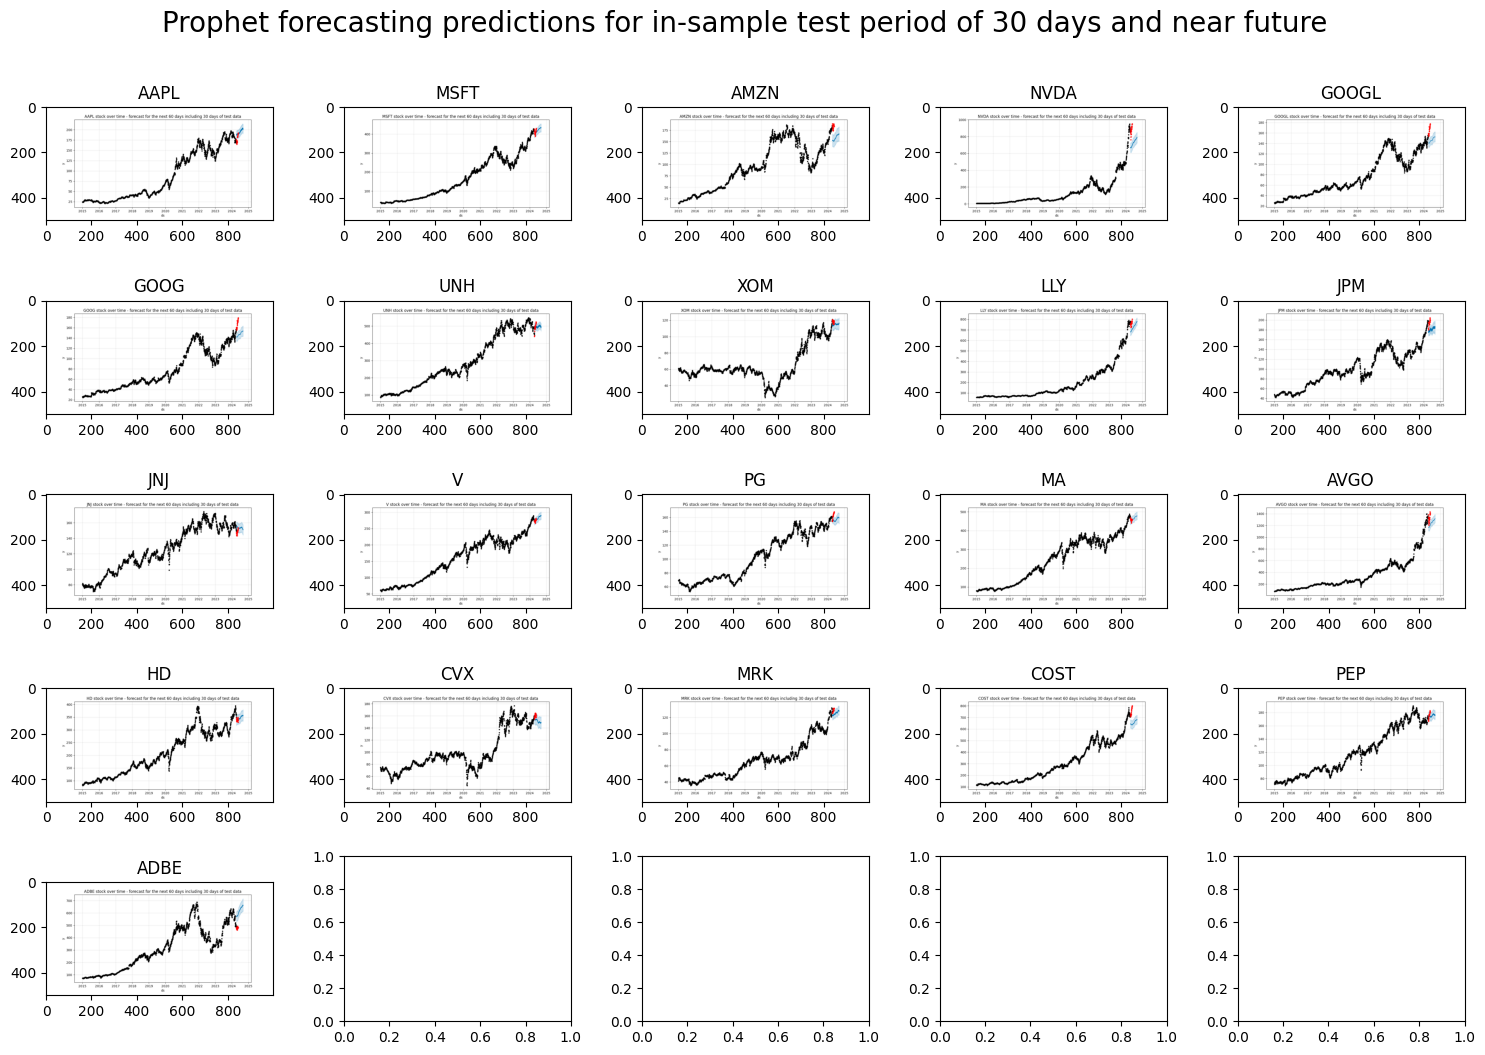

In [42]:
# Checking if the number of stocks is a perfect square
int_sqrt = isqrt(len(existing_top_stocks))
full_sqrt = sqrt(len(existing_top_stocks))

if int_sqrt==full_sqrt: # Perfect square
    nrows=int_sqrt
    ncols=int_sqrt
else:
    nrows=int_sqrt+1
    ncols=ceil(len(existing_top_stocks)/(int_sqrt+1))

# Adding the backslash to the input directory if not present to make the location name consistent
if prophet_folder[-1] != "/":
    prophet_folder += "/"

# Showing a multifacet plot of the metrics
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 10))
for i, stock in enumerate(existing_top_stocks):
    row = i // ncols
    col = i % ncols
    img_path = prophet_folder  + "prophet_e2e_forecast_" + stock + '.png'
    img = mpimg.imread(img_path)
    ax[row, col].imshow(img)
    ax[row, col].set_title(stock)
plt.tight_layout()
plt.suptitle("Prophet forecasting predictions for in-sample test period of 30 days and near future", fontsize=20, y=1.05)
plt.show()


### ARIMA

# Define common variables
data_folder = '../data/'
prophet_folder = '../prophet_charts/'
data_start_date='2015-01-01'
test_size=30

### SARIMA